 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [125]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from pathlib import Path

%matplotlib inline

#defining a Debug_Toggle to turn Debugging Printing on/off
debugging_toggle = True

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [126]:
# Read all the CSV datasets to pandas DataFrames

df_returns_whale = pd.read_csv('Resources/whale_returns.csv',index_col="Date", infer_datetime_format=True, parse_dates=True)
df_returns_algo = pd.read_csv('Resources/algo_returns.csv',index_col="Date", infer_datetime_format=True, parse_dates=True)
df_returns_tsx = pd.read_csv('Resources/sp_tsx_history.csv',index_col="Date", infer_datetime_format=True, parse_dates=True)
if (debugging_toggle):
    print(f"=================HEAD: \tPrinting Famous 'Whale' Investor's Portfolios \n {df_returns_whale.head()}")
    print(f"=================TAIL: \tPrinting Famous 'Whale' Investor's Portfolios \n {df_returns_whale.tail()}")
    print(f"=================HEAD  \tIn-house Trading Algorithms from Company \n {df_returns_algo.head()}")
    print(f"=================TAIL: \tIn-house Trading Algorithms from Company \n {df_returns_algo.tail()}")
    print(f"=================HEAD: \tS&P TSX 60 Indexe \n {df_returns_tsx.head()}")
    print(f"=================TAIL: \tS&P TSX 60 Indexe \n {df_returns_tsx.tail()}")

    
# get the shape of the different datasets

dflist = [df_returns_whale, df_returns_algo, df_returns_tsx]
str_dflist = ["Famous 'Whale' Investor's Portfolios", "In-house Trading Algorithms from Company", "S&P TSX 60 Index"]
if (debugging_toggle):
    for i, dfr in enumerate(dflist):
        #This prints the Shape and the Describe() for the Dataframe
        print(f"=================Printing Shapes of {str_dflist[i]}:\t{dflist[i].shape}") 
        print(f"=================Counting Null Values {str_dflist[i]}:\t{dflist[i].isnull().sum().sum()}")               
        print(f"=================Printing Description of {str_dflist[i]}:\n{dflist[i].describe()}")
        print(f"=================Printing Dtypes of {str_dflist[i]}:\n{dflist[i].dtypes}")

#Check dtypes again to make sure that the DateTimeIndex was completed 
if (debugging_toggle):
    for i, dfr in enumerate(dflist):
        #This prints the Dtypes Dataframe
        print(f"=================Printing Dtypes of {str_dflist[i]}:\n{dflist[i].dtypes}")
        

=================HEAD: 	Printing Famous 'Whale' Investor's Portfolios 
             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098  
=================TAIL: 	Printing Famou

In [127]:
# Reading whale returns

print(f"Printing Shapes of {str_dflist[0]}:\t{dflist[0].shape}") 

Printing Shapes of Famous 'Whale' Investor's Portfolios:	(1060, 4)


In [128]:
# Count nulls

print(f"Counting Null Values {str_dflist[0]}:\t{dflist[0].isnull().sum().sum()}")     


#List of null values:
if (debugging_toggle):
    print(f"=================Printing returns_whale \n {dflist[0].isnull().sum()}")
    print(f"=================Printing returns_whale \n {dflist[0][dflist[0]['SOROS FUND MANAGEMENT LLC'].isnull()]}")


Counting Null Values Famous 'Whale' Investor's Portfolios:	4
=================Printing returns_whale 
 SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64
=================Printing returns_whale 
             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  


In [129]:
# Drop nulls
dflist[0].dropna(inplace=True)
#check if there are any Nulls now.
if (debugging_toggle):
    print(f"=================Printing {str_dflist[0]} \n {dflist[0].isnull().sum()}")
    print(f"=================Printing {str_dflist[0]} \n {dflist[0][dflist[0]['SOROS FUND MANAGEMENT LLC'].isnull()]}")
    print(f"=================Printing Shapes of {str_dflist[0]}:\t{dflist[0].shape}") 



=================Printing Famous 'Whale' Investor's Portfolios 
 SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64
=================Printing Famous 'Whale' Investor's Portfolios 
 Empty DataFrame
Columns: [SOROS FUND MANAGEMENT LLC, PAULSON & CO.INC. , TIGER GLOBAL MANAGEMENT LLC, BERKSHIRE HATHAWAY INC]
Index: []
=================Printing Shapes of Famous 'Whale' Investor's Portfolios:	(1059, 4)


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [130]:
# Reading algorithmic returns
print(f"Printing Shapes of {str_dflist[1]}:\t{dflist[1].shape}") 

Printing Shapes of In-house Trading Algorithms from Company:	(1241, 2)


In [131]:
# Count nulls
print(f"Counting Null Values {str_dflist[1]}:\t{dflist[1].isnull().sum().sum()}")    

#List of null values:
if (debugging_toggle):
    print(f"=================Printing returns_whale \n {dflist[1].isnull().sum()}")
    print(f"=================Printing returns_whale \n {dflist[1][dflist[1]['Algo 1'].isnull()]}")
    print(f"=================Printing returns_whale \n {dflist[1][dflist[1]['Algo 2'].isnull()]}")



Counting Null Values In-house Trading Algorithms from Company:	6
=================Printing returns_whale 
 Algo 1    0
Algo 2    6
dtype: int64
=================Printing returns_whale 
 Empty DataFrame
Columns: [Algo 1, Algo 2]
Index: []
=================Printing returns_whale 
               Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN
2014-06-04 -0.001838     NaN


In [132]:
# Drop nulls
dflist[1].dropna(inplace=True)
#check if there are any Nulls now.
if (debugging_toggle):
    print(f"=================Printing {str_dflist[1]} \n {dflist[1].isnull().sum()}")
    print(f"=================Printing {str_dflist[1]} \n {dflist[1][dflist[1]['Algo 2'].isnull()]}")
    print(f"=================Printing Shapes of {str_dflist[1]}:\t{dflist[1].shape}") 



=================Printing In-house Trading Algorithms from Company 
 Algo 1    0
Algo 2    0
dtype: int64
=================Printing In-house Trading Algorithms from Company 
 Empty DataFrame
Columns: [Algo 1, Algo 2]
Index: []
=================Printing Shapes of In-house Trading Algorithms from Company:	(1235, 2)


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [133]:
# Reading S&P TSX 60 Closing Prices
print(f"Printing Shapes of {str_dflist[2]}:\t{dflist[2].shape}") 

Printing Shapes of S&P TSX 60 Index:	(1818, 1)


In [134]:
# Check Data Types
print(f"Printing Dtypes of {str_dflist[2]}:\n{dflist[2].dtypes}")

Printing Dtypes of S&P TSX 60 Index:
Close    object
dtype: object


In [135]:
# Fix Data Types

#we do this by removing the "$" and "," characters from string
#then we typecase the the string o a float
dflist[2]["Close"] = [float((x.replace('$',"")).replace(',',"")) for x in dflist[2]["Close"]]

# Check Data Types to show the change from object to float
print(f"Printing Dtypes of {str_dflist[2]}:\n{dflist[2].dtypes}")

Printing Dtypes of S&P TSX 60 Index:
Close    float64
dtype: object


In [139]:
# Calculate Daily Returns
df_sptsx_change = dflist[2]["Close"].pct_change()
if (debugging_toggle):
    # Check Data Types to show the change from object to float
    print(f"Printing Dtypes of {str_dflist[2]}:\n{dflist[2].dtypes}")
    print(f"Printing Dtypes of df_sptsx_change:\n{df_sptsx_change.dtypes}")
    print(f"=================HEAD: \tS&P TSX 60 Change \n {df_sptsx_change.head()}")
    print(f"=================TAIL: \tS&P TSX 60 Change \n {df_sptsx_change.tail()}")
    print(f"=================DESCRIBE: \tS&P TSX 60 Change \n {df_sptsx_change.describe}")

Printing Dtypes of S&P TSX 60 Index:
Close    float64
dtype: object
Printing Dtypes of df_sptsx_change:
float64
=================HEAD: 	S&P TSX 60 Change 
 Date
2012-10-01         NaN
2012-10-02    0.001701
2012-10-03   -0.002563
2012-10-04    0.007137
2012-10-05   -0.002305
Name: Close, dtype: float64
=================TAIL: 	S&P TSX 60 Change 
 Date
2019-12-20    0.003188
2019-12-23    0.000600
2019-12-24    0.003003
2019-12-27   -0.000695
2019-12-30   -0.004057
Name: Close, dtype: float64
=================DESCRIBE: 	S&P TSX 60 Change 
 <bound method NDFrame.describe of Date
2012-10-01         NaN
2012-10-02    0.001701
2012-10-03   -0.002563
2012-10-04    0.007137
2012-10-05   -0.002305
                ...   
2019-12-20    0.003188
2019-12-23    0.000600
2019-12-24    0.003003
2019-12-27   -0.000695
2019-12-30   -0.004057
Name: Close, Length: 1818, dtype: float64>


In [141]:
# Drop nulls

# Count nulls
print(f"Counting Null Values S&P TSX 60 Change:\t{df_sptsx_change.isnull().sum().sum()}")    

#List of null values:
if (debugging_toggle):
    print(f"=================Printing returns_whale \n {df_sptsx_change.isnull().sum()}")


# Drop nulls    
df_sptsx_change.dropna(inplace=True)

#check if there are any Nulls now.
if (debugging_toggle):
    print(f"=================Printing S&P TSX 60 Change:\n {df_sptsx_change.isnull().sum()}")


Counting Null Values S&P TSX 60 Change:	1
=================Printing returns_whale 
 1
=================Printing S&P TSX 60 Change:
 0


In [144]:



if (debugging_toggle):
    print(f"=================HEAD: \tS&P TSX 60 Index \n {dflist[2].head()}")
    print(f"=================TAIL: \tS&P TSX 60 Index \n {dflist[2].tail()}")

=================HEAD: 	S&P TSX 60 Index 
                Close
Date                
2012-10-01  12370.19
2012-10-02  12391.23
2012-10-03  12359.47
2012-10-04  12447.68
2012-10-05  12418.99
=================TAIL: 	S&P TSX 60 Index 
                Close
Date                
2019-12-20  17118.44
2019-12-23  17128.71
2019-12-24  17180.15
2019-12-27  17168.21
2019-12-30  17098.56


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [145]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
#combined_df = pd.concat([Whales_df, Algo_df, daily_return], axis = 'columns', join = 'inner')
#combined_df.head()

#df_consolidated = dflist[0].merge(dflist[1], how="left", on="Date").dropna()
#df_consolidated = df_consolidated.merge(dflist[2], how="left",on='Date').dropna()  

df_consolidated = pd.concat([dflist[0],dflist[1],df_sptsx_change], axis = 'columns', join = 'inner')

# Rename `Close` Column to be specific to this portfolio.
# df = df.rename(columns={'oldName1': 'newName1'})
df_consolidated.rename(columns={'Close':'S&P TSX 60'},inplace=True)

if (debugging_toggle):
    print(f"=================Printing Shapes of {df_consolidated.shape}")              
    print(f"=================Printing Dtypes of {df_consolidated.dtypes}")
    print(f"=================HEAD: DF_CONSOLIDATED \n {df_consolidated.head()}")
    print(f"=================TAIL: DF_CONSOLIDATED \n {df_consolidated.tail()}")

=================Printing Shapes of (1029, 7)
=================Printing Dtypes of SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
Algo 1                         float64
Algo 2                         float64
S&P TSX 60                     float64
dtype: object
=================HEAD: DF_CONSOLIDATED 
             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

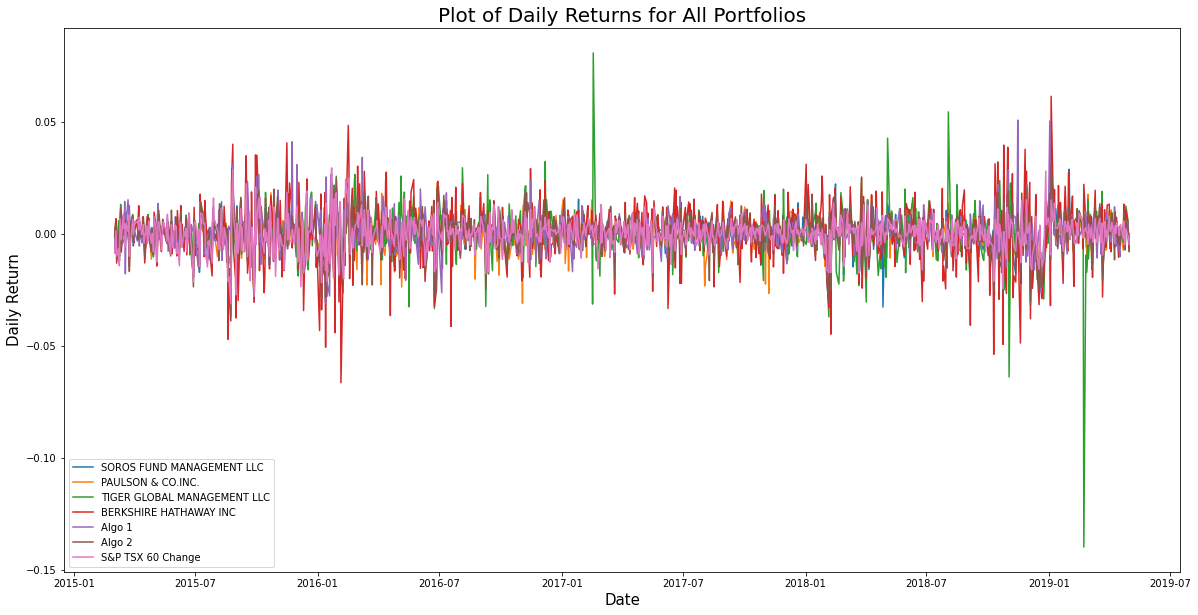

In [92]:
# Plot daily returns of all portfolios

#plt.figure(figsize=(20,10))
#x = df['Date']
#y = df['Price']
#plt.plot(x,y)
#plt.title('Price of Golds',fontsize=20)
#plt.xlabel('Date')
#plt.ylabel('Price')


plt.figure(figsize=(20,10))
portfolio_items = list(df_consolidated.columns)
portfolio_items.remove('Date')
portfolio_items.remove('S&P TSX 60 Close')

for portfolio_item in portfolio_items:
    plt.plot(list(df_consolidated['Date']), list(df_consolidated[portfolio_item]))


plt.title('Plot of Daily Returns for All Portfolios', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Daily Return', fontsize=15)
plt.legend(portfolio_items, loc="lower left", fontsize=10)

#### Calculate and Plot cumulative returns.

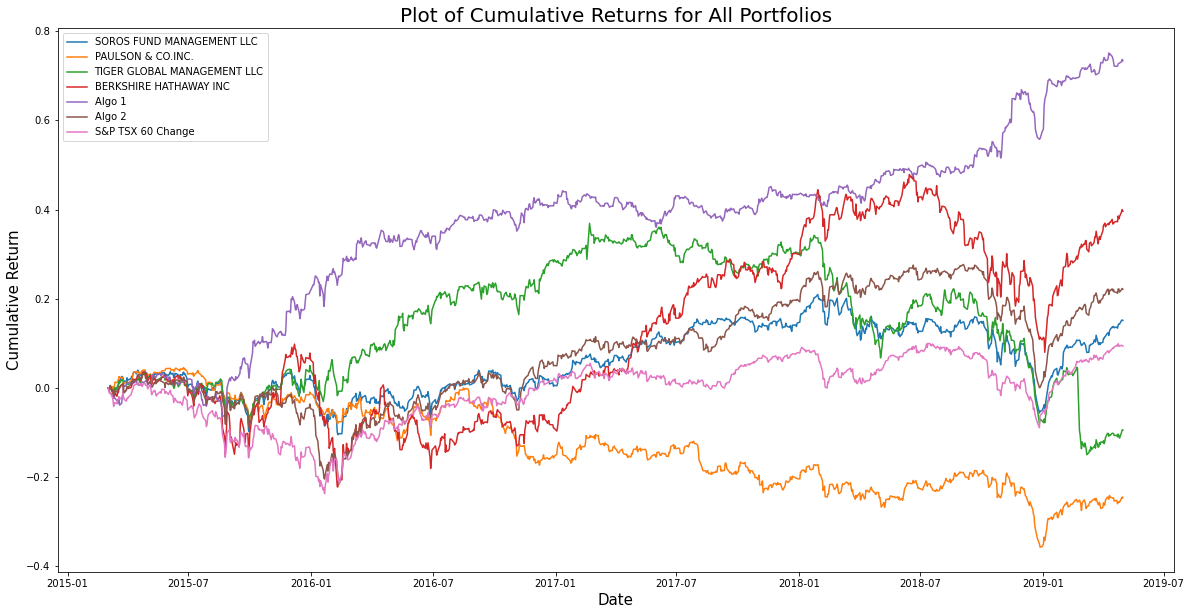

In [98]:
# Calculate cumulative returns of all portfolios

plt.figure(figsize=(20,10))
for portfolio_item in portfolio_items: # Go through each portfolio
    # Initialize List for Cumulative returns
    cumulative_returns = [] 
    # Extract daily returns information of the specified portfolio
    portfolio_returns = df_consolidated[portfolio_item] 
    for i in range(len(portfolio_returns)): # i represents the number of elements I need to sum
        # If we're on the first day, the cumulative return is simply 0
        if i == 0: 
            cumulative_returns.append(0)
        else: 
            # Else, sum up all daily returns from 0 up till the current day as today's cumulative return
            cumulative_returns.append(sum(portfolio_returns[0:i]))
# Plot cumulative returns
    plt.plot(list(df_consolidated['Date']), cumulative_returns) 
plt.title('Plot of Cumulative Returns for All Portfolios', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Cumulative Return', fontsize=15)
plt.legend(portfolio_items, loc="upper left", fontsize=10)

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


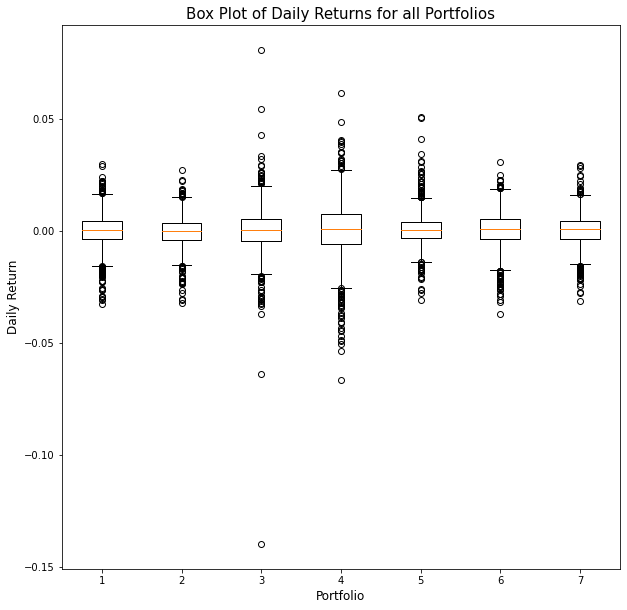

In [103]:
# Box plot to visually show risk

plt.figure(figsize=(10, 10))
#bp = plt.boxplot(df_consolidated[portfolio_items], notch=0, sym='+', vert=1, whis=1.5)
bp = plt.boxplot(df_consolidated[portfolio_items])
plt.title('Box Plot of Daily Returns for all Portfolios', fontsize = 15)
#plt.xticks(range(1, len(portfolio_items) + 1), portfolio_items, rotation='vertical')
plt.xlabel('Portfolio', fontsize = 12)
plt.ylabel('Daily Return', fontsize = 12)
#plt.setp(bp['boxes'], color='black')
#plt.setp(bp['whiskers'], color='black')
#plt.setp(bp['fliers'], color='red', marker='+')
plt.show()

### Calculate Standard Deviations

In [ ]:
# Calculate the daily standard deviations of all portfolios
combined_df.plot.box(title= "Risk Portfolio", figsize=(20,10))

### Determine which portfolios are riskier than the S&P TSX 60

In [ ]:
# Calculate  the daily standard deviation of S&P TSX 60

# Determine which portfolios are riskier than the S&P TSX 60


### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized standard deviation (252 trading days)


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [ ]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate the correlation

# Display de correlation matrix


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [ ]:
# Calculate covariance of a single portfolio

# Calculate variance of S&P TSX

# Computing beta

# Plot beta trend


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [ ]:
# Reading data from 1st stock


In [ ]:
# Reading data from 2nd stock


In [ ]:
# Reading data from 3rd stock


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!